<a href="https://colab.research.google.com/github/namdori61/COVID-19/blob/master/COVID19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(16,10)})
sns.set(font_scale = 2)

## Data

In [0]:
PATH = 'gdrive/My Drive/SNA/data/'

In [6]:
# PatientInfo: Epidemiological data of COVID-19 patients in South Korea
patient_info = pd.read_csv(PATH+'PatientInfo.csv')
patient_info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [7]:
patient_info.describe(include='all')

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
count,3.519000e+03,2388.000000,3361,2975.000000,3353,3519,3519,3440,18,2749,31.000000,8.360000e+02,648.000000,495,3516,1357,62,3519
unique,NaN,NaN,2,NaN,11,14,17,154,1,24,NaN,NaN,NaN,82,101,83,35,3
top,NaN,NaN,female,NaN,20s,Korea,Gyeongsangbuk-do,Gyeongsan-si,True,contact with patient,NaN,NaN,NaN,2020-02-27,2020-03-05,2020-03-20,2020-03-02,released
freq,NaN,NaN,1865,NaN,824,3490,1230,632,18,994,NaN,NaN,NaN,29,145,71,4,2045
mean,3.423590e+09,6931.521357,NaN,1975.260840,NaN,NaN,NaN,NaN,NaN,NaN,2.387097,2.650059e+09,18.044753,NaN,NaN,NaN,NaN,NaN
std,2.201880e+09,3370.047255,NaN,20.235363,NaN,NaN,NaN,NaN,NaN,NaN,1.453213,1.732830e+09,73.455868,NaN,NaN,NaN,NaN,NaN
min,1.000000e+09,1.000000,NaN,1916.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+09,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1.200000e+09,4707.000000,NaN,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.200000e+09,2.000000,NaN,NaN,NaN,NaN,NaN
50%,2.000001e+09,8123.000000,NaN,1975.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000e+09,4.000000,NaN,NaN,NaN,NaN,NaN
75%,6.001000e+09,9697.250000,NaN,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.100000e+09,13.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3519 non-null   int64  
 1   global_num          2388 non-null   float64
 2   sex                 3361 non-null   object 
 3   birth_year          2975 non-null   float64
 4   age                 3353 non-null   object 
 5   country             3519 non-null   object 
 6   province            3519 non-null   object 
 7   city                3440 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2749 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         836 non-null    float64
 12  contact_number      648 non-null    float64
 13  symptom_onset_date  495 non-null    object 
 14  confirmed_date      3516 non-null   object 
 15  released_date       1357 non-null   object 
 16  deceas

In [9]:
patient_info.isnull().sum() / patient_info.shape[0]

patient_id            0.000000
global_num            0.321398
sex                   0.044899
birth_year            0.154589
age                   0.047172
country               0.000000
province              0.000000
city                  0.022450
disease               0.994885
infection_case        0.218812
infection_order       0.991191
infected_by           0.762433
contact_number        0.815857
symptom_onset_date    0.859335
confirmed_date        0.000853
released_date         0.614379
deceased_date         0.982381
state                 0.000000
dtype: float64

## EDA

Text(0.5, 1.0, 'Number of patients by province')

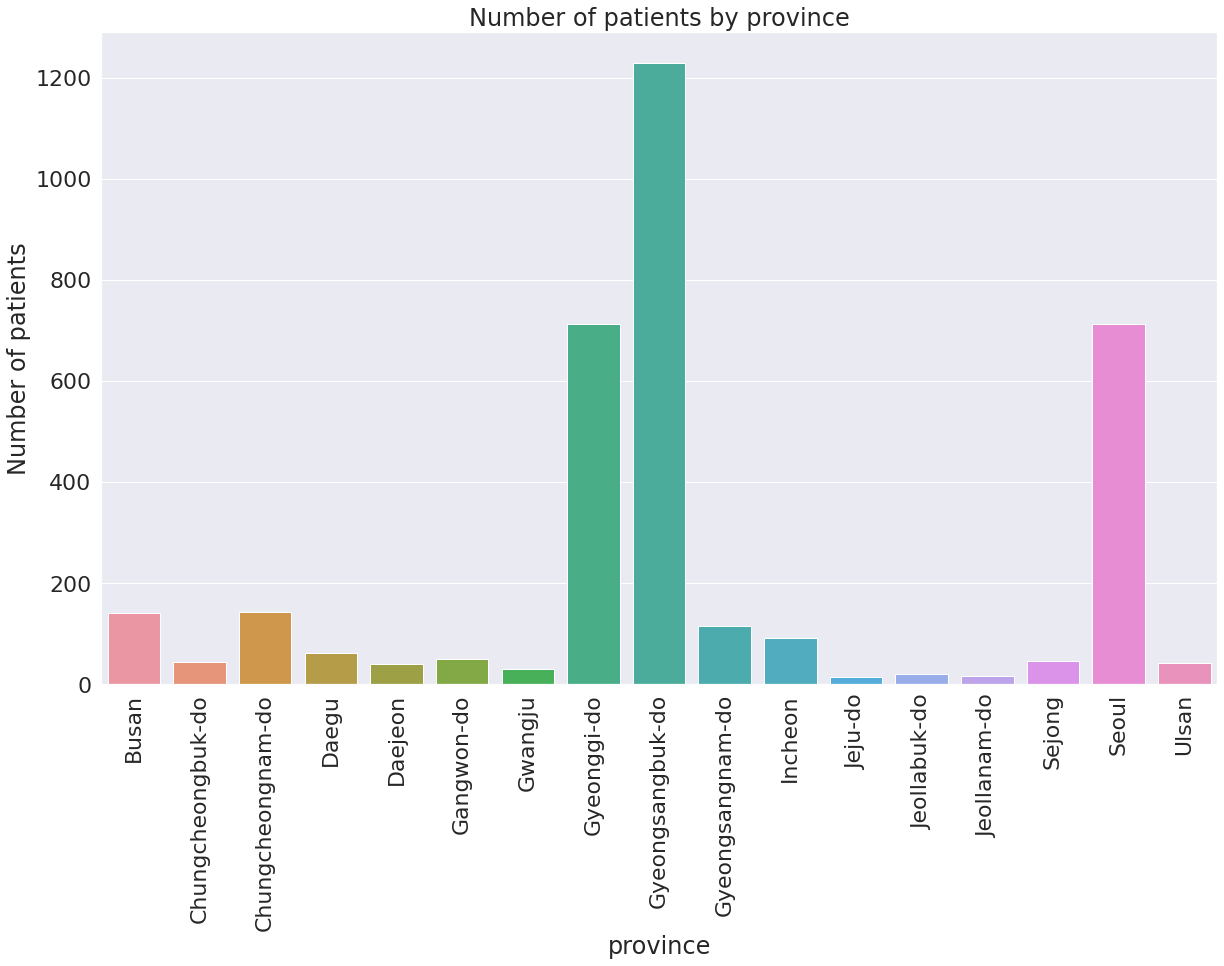

In [11]:
# Visualize number of patients by province
by_prov = sns.barplot(x='province', y='patient_id', data=patient_info.groupby('province')['patient_id'].count().reset_index())
plt.xticks(rotation=90)
by_prov.set_ylabel('Number of patients')
by_prov.set_title('Number of patients by province')

Text(0.5, 1.0, 'Number of patients by age')

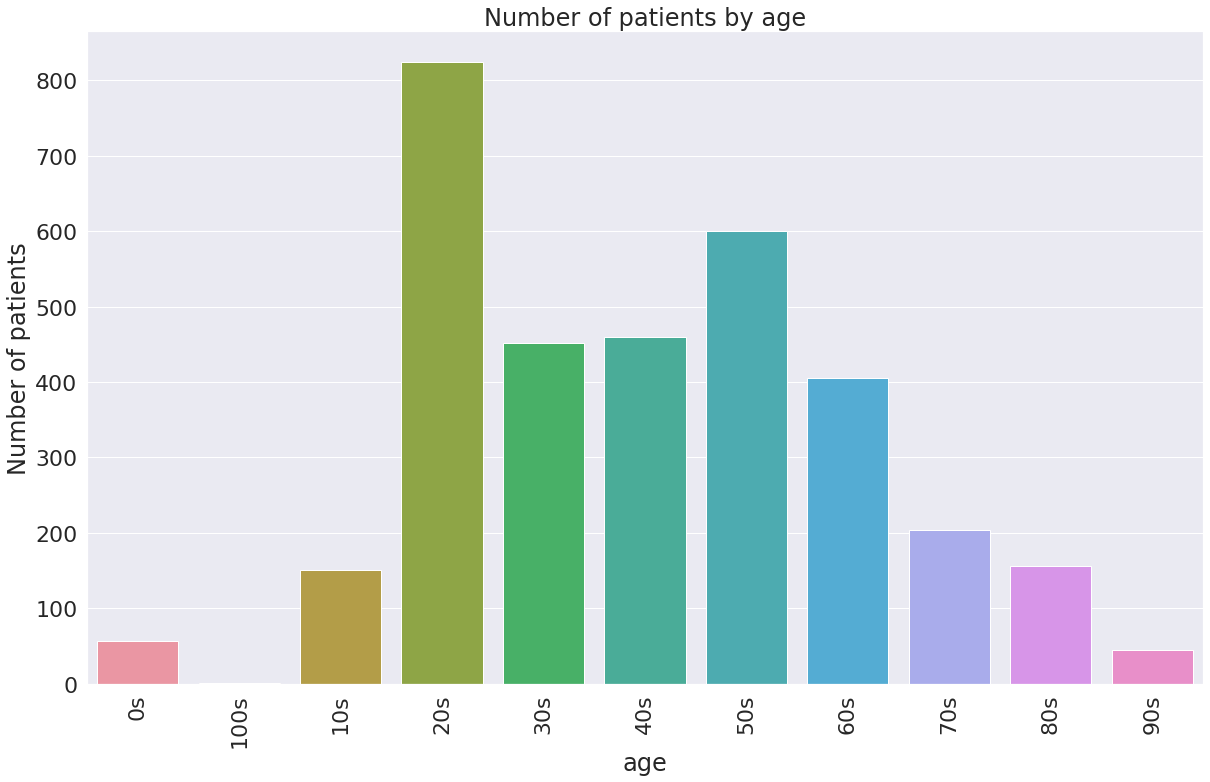

In [12]:
# Visualize number of patients by age
by_age = sns.barplot(x='age', y='patient_id', data=patient_info.groupby('age')['patient_id'].count().reset_index())
plt.xticks(rotation=90)
by_age.set_ylabel('Number of patients')
by_age.set_title('Number of patients by age')

Text(0.5, 1.0, 'Number of patients by infection case')

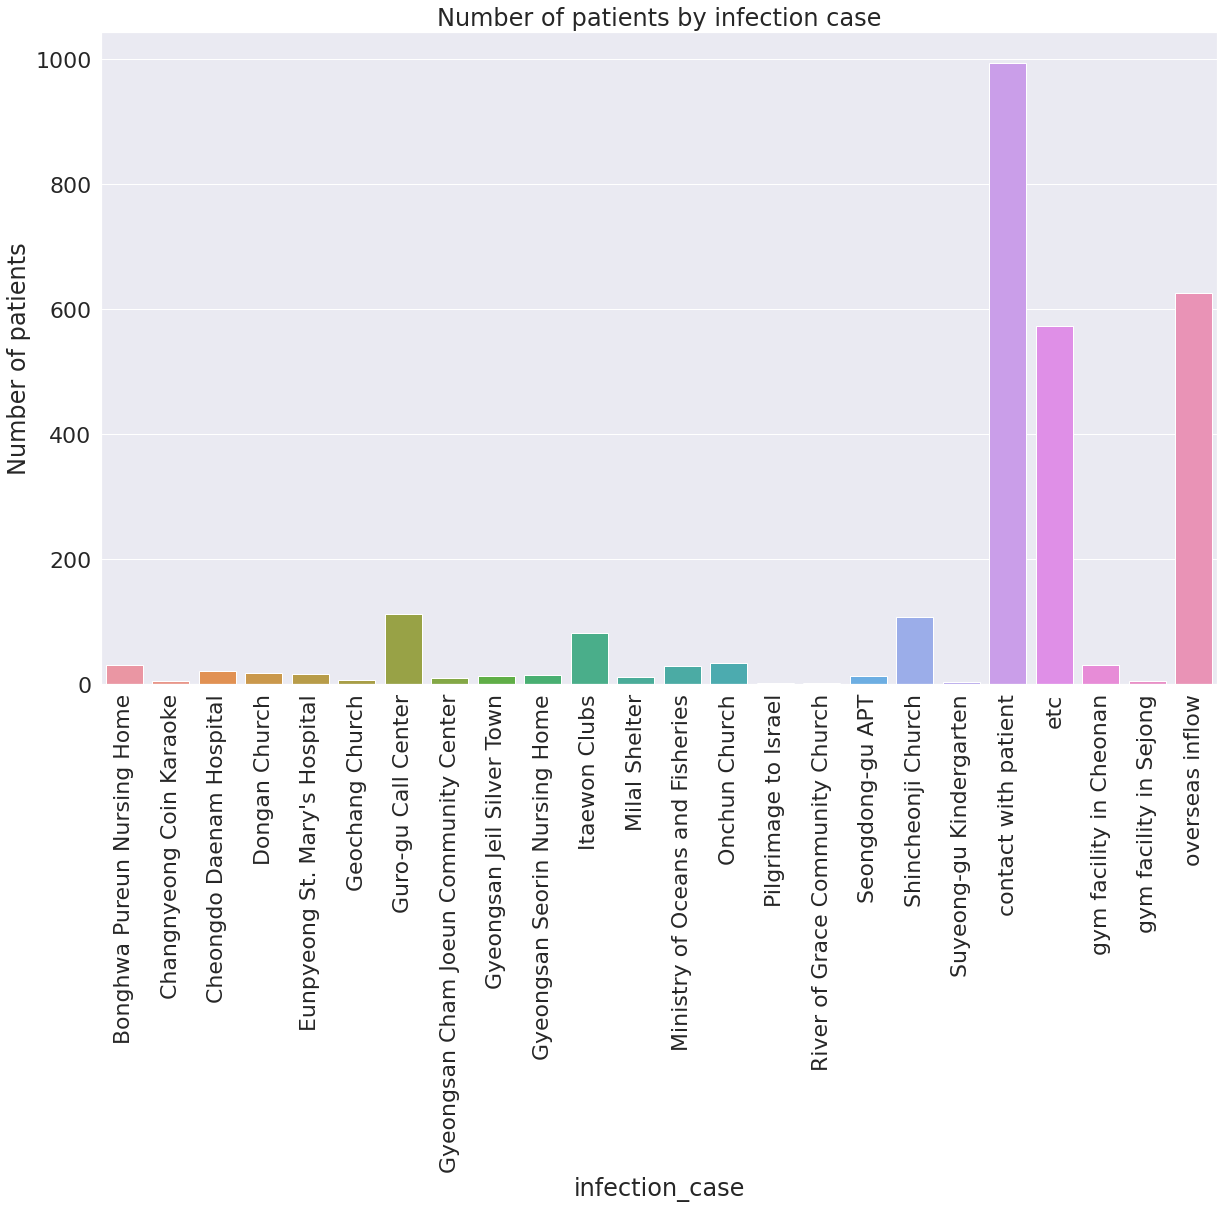

In [13]:
# Visualize number of patients by infection case
by_inf_case = sns.barplot(x='infection_case', y='patient_id', data=patient_info.groupby('infection_case')['patient_id'].count().reset_index())
plt.xticks(rotation=90)
by_inf_case.set_ylabel('Number of patients')
by_inf_case.set_title('Number of patients by infection case')

In [16]:
df = patient_info[patient_info['infected_by'].notnull()]

df['infected_by'] = df['infected_by'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Simple graph of patient infection relation')

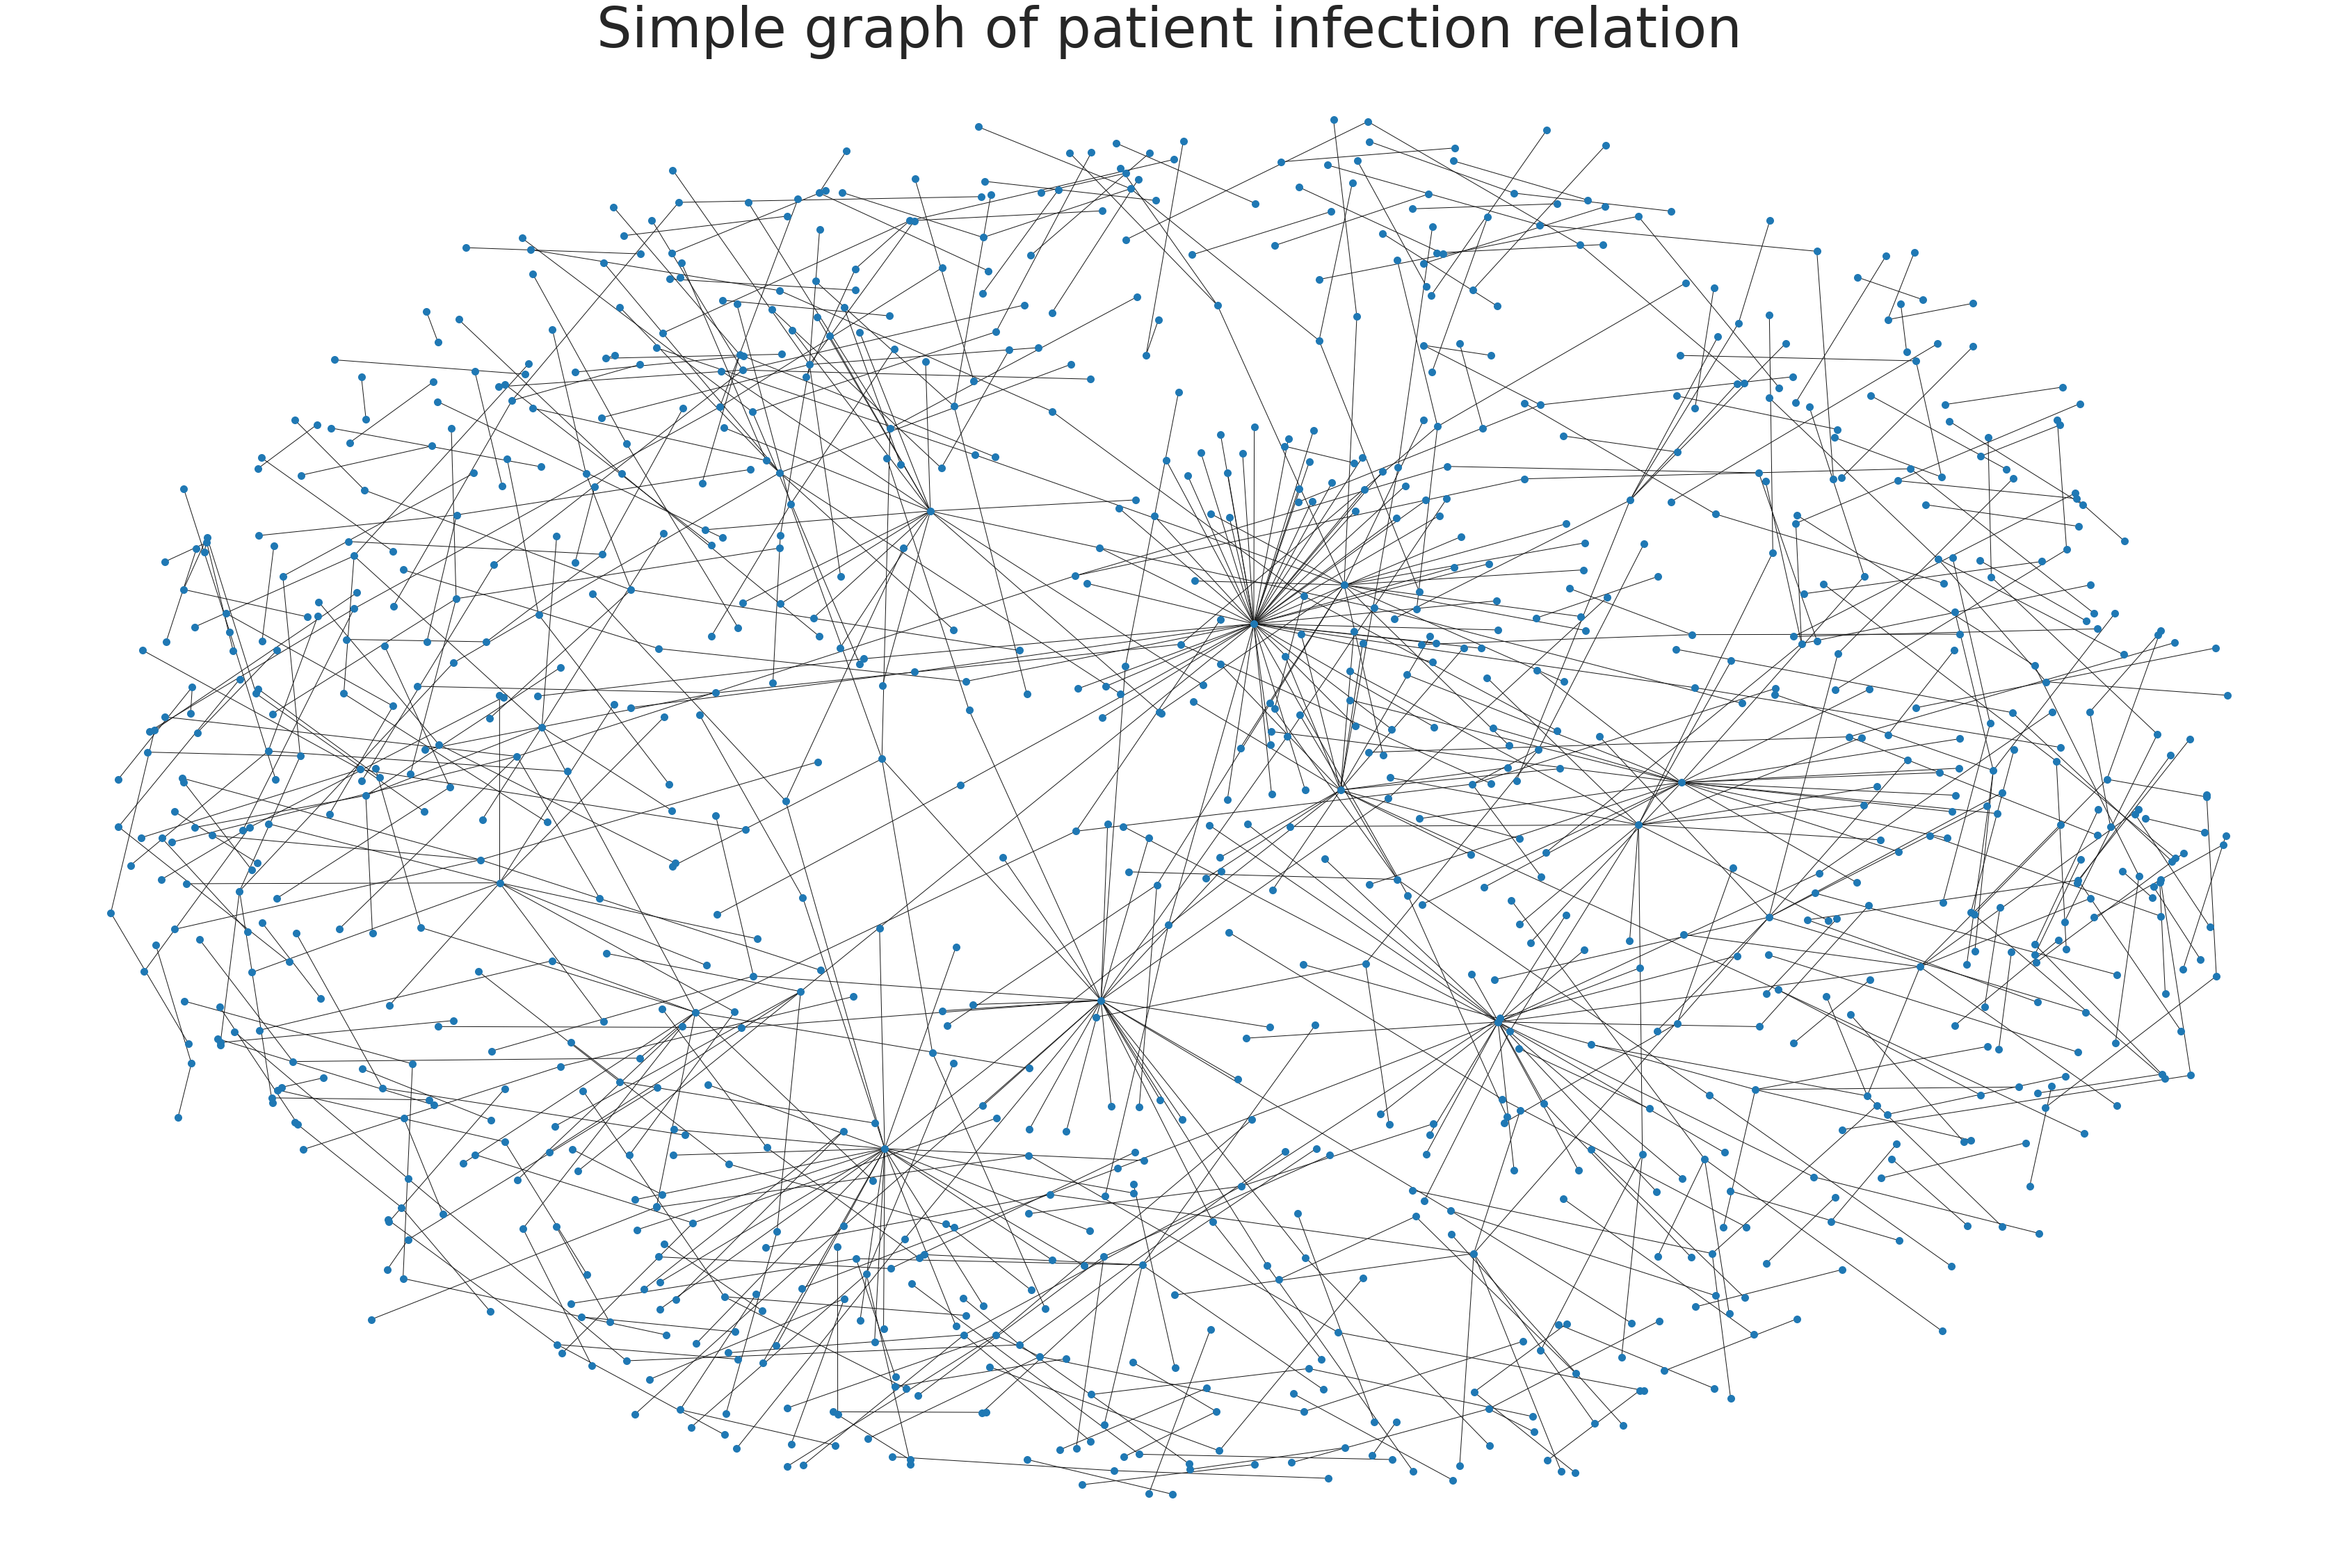

In [19]:
# Visualize the most simple version graph of patient infection relation
import math

plt.figure(figsize=(60,40))
plt.axis('off')

G = nx.from_pandas_edgelist(df, 'infected_by', 'patient_id', edge_attr=True)

G.add_nodes_from(nodes_for_adding=df['patient_id'].tolist())

pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=50)

nx.draw_networkx(G, pos, node_size=100, with_labels=False)

plt.title('Simple graph of patient infection relation', {'fontsize':80})